In [1]:
'''
https://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification
https://scikit-learn.org/stable/supervised_learning.html
'''

'\nhttps://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification\nhttps://scikit-learn.org/stable/supervised_learning.html\n'

In [2]:
import os
# os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz/bin/'
import pandas as pd
from sklearn import tree
#score
from sklearn.metrics import precision_score, accuracy_score, roc_auc_score, confusion_matrix,f1_score, roc_curve, auc, recall_score
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
# from sklearn.metrics import plot_confusion_matrix -> Plot_Confusion_Matrix is deprecated
from sklearn.metrics import ConfusionMatrixDisplay

#Read data

In [3]:
#Read data
df_agg = pd.read_csv("Sample Data/FS_ALL.csv")
df_agg.head()

,"Total debt service (% of exports of goods, services and primary income)",Short-term debt (% of total external debt),Real interest rate (%),Total reserves minus gold (in %),Trade (% of GDP),Imports of goods and services (current US$),Exports of goods and services (current US$),Current account balance (% of GDP),"Portfolio investment, net (BoP, current US$)","Foreign direct investment, net inflows (% of GDP)",...,Left Government (democ),Polity (polity),Durable (durable),Turnover (xconst),Legislative/Executive election (exrec),State fragility index (sfi),Years (poleff),Economic Effectiveness (ecoeff),Presist (presistance),Target
0,0.0,0.0,0.511705,1.000000,0.380783,0.002563,0.003350,0.453849,0.206589,0.038336,...,1.0,1.0,0.775862,1.0,1.0,0.166667,0.0,0.0,1.0,0
1,0.0,0.0,0.512088,0.848367,0.371018,0.003331,0.003961,0.461811,0.206589,0.038640,...,1.0,1.0,0.784483,1.0,1.0,0.166667,0.0,0.0,1.0,0
2,0.0,0.0,0.511337,0.664417,0.338931,0.004087,0.005054,0.469933,0.206589,0.048814,...,1.0,1.0,0.793103,1.0,1.0,0.166667,0.0,0.0,1.0,0
3,0.0,0.0,0.509767,0.472346,0.347603,0.006803,0.007776,0.476156,0.206589,0.073088,...,1.0,1.0,0.801724,1.0,1.0,0.166667,0.0,0.0,1.0,0
4,0.0,0.0,0.508391,0.404584,0.356862,0.008622,0.009476,0.483780,0.206589,0.043774,...,1.0,1.0,0.810345,1.0,1.0,0.166667,0.0,0.0,1.0,0


#Explore the Data

#Classification with Scikit-Learn

In [4]:
from sklearn import svm
import numpy as np

# Read Data
X = df_agg.drop(columns=['Target','Short-term debt (% of total external debt)','Total debt service (% of exports of goods, services and primary income)'])
X = X.values
y = df_agg['Target'].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 1)

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


Confusion Matrix:
 [[64  4]
 [ 6  4]]
Accuracy: 0.8717948717948718
Recall Score (Macro) 0.6705882352941177
Recall Score (Default) 0.4
Precision Score (Macro) 0.7071428571428571
Precision Score (Default) 0.5
F1 Score (Macro): 0.6859903381642511
F1 Score (Default): 0.4444444444444445
ROC_AUC Score 0.6705882352941176


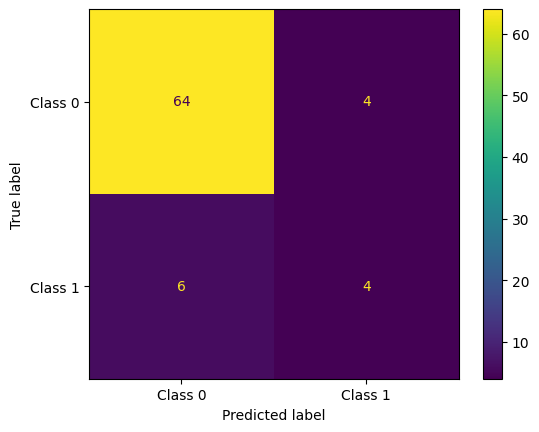

In [6]:
# Performance Metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Recall Score (Macro)", recall_score(y_test, y_pred, average='macro',zero_division=1))
print("Recall Score (Default)", recall_score(y_test, y_pred, zero_division=1))     

print("Precision Score (Macro)",precision_score(y_test, y_pred, average='macro',zero_division=1))
print("Precision Score (Default)",precision_score(y_test, y_pred, zero_division=1))

print("F1 Score (Macro):", f1_score(y_test, y_pred, average='macro'))
print("F1 Score (Default):", f1_score(y_test, y_pred,zero_division=1))

print("ROC_AUC Score",roc_auc_score(y_test,y_pred,multi_class='ovr'))

cm = confusion_matrix(y_test, y_pred)

# Create an instance of the ConfusionMatrixDisplay class
cmd = ConfusionMatrixDisplay(cm, display_labels=['Class 0', 'Class 1'])

# Call the plot() method of the ConfusionMatrixDisplay object to display the confusion matrix
cmd.plot()

# plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

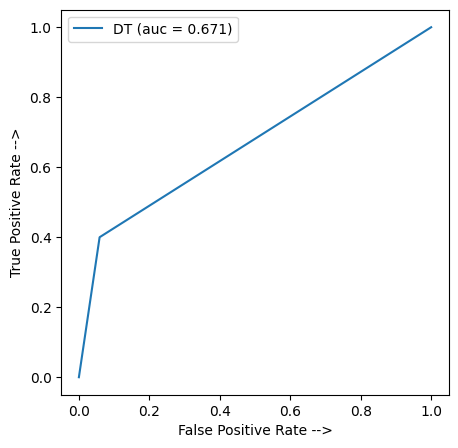

In [7]:

fpr, tpr, threshold = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr, tpr, linestyle='-', label='DT (auc = %0.3f)' % auc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.show()


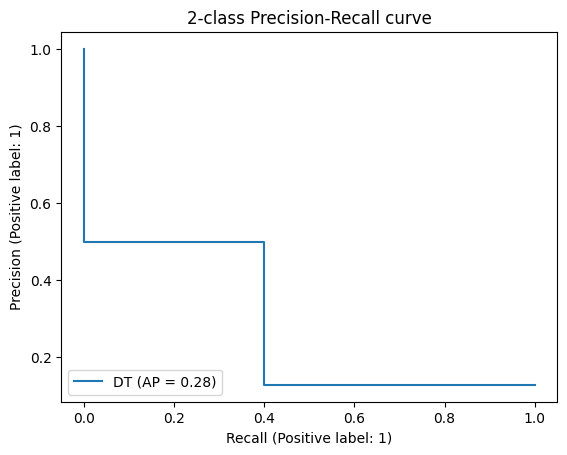

In [8]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="DT"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

[Text(0.675, 0.9444444444444444, 'x[10] <= 0.254\ngini = 0.187\nsamples = 182\nvalue = [163, 19]'),
 Text(0.6083333333333333, 0.8333333333333334, 'x[1] <= 0.001\ngini = 0.137\nsamples = 176\nvalue = [163, 13]'),
 Text(0.5416666666666666, 0.7222222222222222, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.675, 0.7222222222222222, 'x[20] <= 0.5\ngini = 0.118\nsamples = 174\nvalue = [163, 11]'),
 Text(0.48333333333333334, 0.6111111111111112, 'x[16] <= 0.671\ngini = 0.1\nsamples = 171\nvalue = [162, 9]'),
 Text(0.3, 0.5, 'x[0] <= 0.441\ngini = 0.081\nsamples = 166\nvalue = [159, 7]'),
 Text(0.13333333333333333, 0.3888888888888889, 'x[3] <= 0.547\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.06666666666666667, 0.2777777777777778, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.2, 0.2777777777777778, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4666666666666667, 0.3888888888888889, 'x[5] <= 0.293\ngini = 0.06\nsamples = 161\nvalue = [156, 5]'),
 Text(0.3333333333333333,

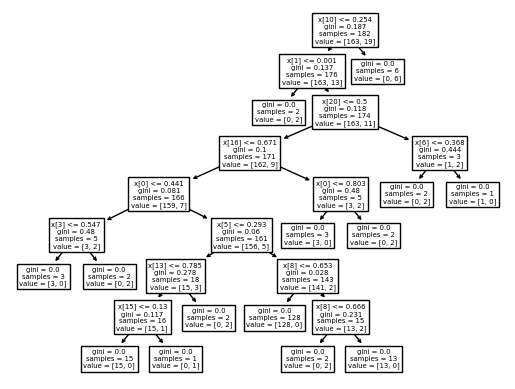

In [9]:
tree.plot_tree(clf)

In [10]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
#graph.render("CCSP") 

In [11]:
'''
# the array must be change into some format to show the names
dot_data = tree.export_graphviz(clf, out_file=None, 
                     #feature_names=X.feature_names,  
                     #class_names=y.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 
'''

'\n# the array must be change into some format to show the names\ndot_data = tree.export_graphviz(clf, out_file=None, \n                     #feature_names=X.feature_names,  \n                     #class_names=y.target_names,  \n                     filled=True, rounded=True,  \n                     special_characters=True)  \ngraph = graphviz.Source(dot_data)  \ngraph \n'

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

decision_tree = DecisionTreeClassifier(random_state=0, max_depth=50)
decision_tree = decision_tree.fit(X_train, y_train)
r = export_text(decision_tree)
print(r)

|--- feature_10 <= 0.25
|   |--- feature_1 <= 0.00
|   |   |--- class: 1
|   |--- feature_1 >  0.00
|   |   |--- feature_20 <= 0.50
|   |   |   |--- feature_16 <= 0.67
|   |   |   |   |--- feature_0 <= 0.44
|   |   |   |   |   |--- feature_5 <= 0.39
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_5 >  0.39
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  0.44
|   |   |   |   |   |--- feature_5 <= 0.29
|   |   |   |   |   |   |--- feature_13 <= 0.79
|   |   |   |   |   |   |   |--- feature_13 <= 0.17
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_13 >  0.17
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_13 >  0.79
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_5 >  0.29
|   |   |   |   |   |   |--- feature_8 <= 0.65
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_8 >  0.65
|   |   |   |   |   |   |   |--- fea

In [13]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier()
clf = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, scoring=['recall','f1'],refit='f1',verbose=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

"""               
Warnings:
This warning can occur when using cross-validation techniques, such as GridSearchCV, 
to evaluate the performance of a model. 
The warning indicates that there may be a problem with the model or the data, 
and that the results of the evaluation may not be reliable.
"""

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/home/pogo/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/home/pogo/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pogo/.local/lib/python3.10/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/home/pogo/.local/lib/python3.10/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/home/pogo/.local/lib/pytho

'               \nWarnings:\nThis warning can occur when using cross-validation techniques, such as GridSearchCV, \nto evaluate the performance of a model. \nThe warning indicates that there may be a problem with the model or the data, \nand that the results of the evaluation may not be reliable.\n'

Confusion Matrix:
 [[64  4]
 [ 6  4]]
Accuracy: 0.8717948717948718
Recall Score (Macro) 0.6705882352941177
Recall Score (Default) 0.4
Precision Score (Macro) 0.7071428571428571
Precision Score (Default) 0.5
F1 Score (Macro): 0.6859903381642511
F1 Score (Default): 0.4444444444444445
ROC_AUC Score 0.6705882352941176


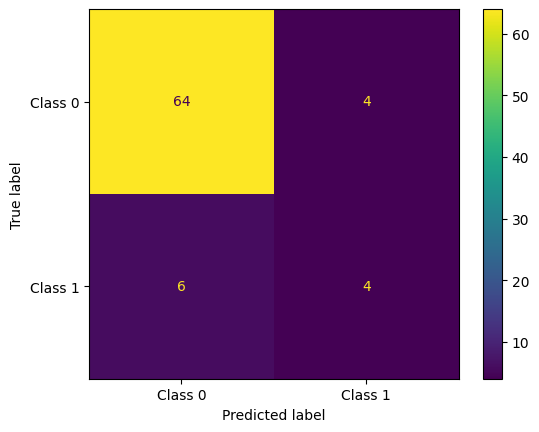

In [14]:
# AFTER GridSearchCV 
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Recall Score (Macro)", recall_score(y_test, y_pred, average='macro',zero_division=1))
print("Recall Score (Default)", recall_score(y_test, y_pred, zero_division=1))     

print("Precision Score (Macro)",precision_score(y_test, y_pred, average='macro',zero_division=1))
print("Precision Score (Default)",precision_score(y_test, y_pred, zero_division=1))

print("F1 Score (Macro):", f1_score(y_test, y_pred, average='macro'))
print("F1 Score (Default):", f1_score(y_test, y_pred,zero_division=1))
print("ROC_AUC Score",roc_auc_score(y_test,y_pred,multi_class='ovr'))


cm = confusion_matrix(y_test, y_pred)

# Create an instance of the ConfusionMatrixDisplay class
cmd = ConfusionMatrixDisplay(cm, display_labels=['Class 0', 'Class 1'])

# Call the plot() method of the ConfusionMatrixDisplay object to display the confusion matrix
cmd.plot()

# plot_confusion_matrix(clf, X_test, y_test)  
plt.show()


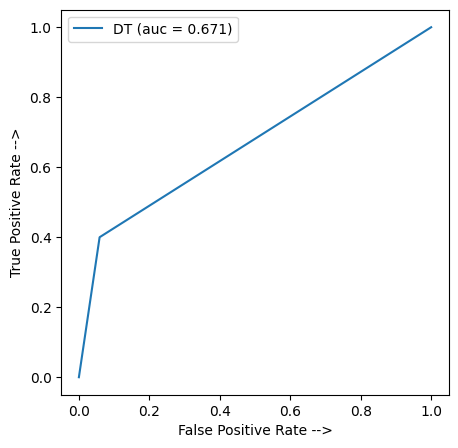

In [15]:
from sklearn.metrics import precision_score, accuracy_score, roc_auc_score, confusion_matrix,f1_score, roc_curve, auc, recall_score

fpr, tpr, threshold = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr, tpr, linestyle='-', label='DT (auc = %0.3f)' % auc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()
plt.show()


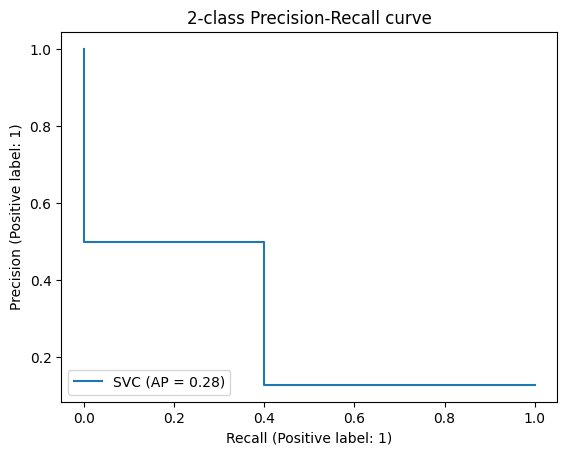

In [16]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="SVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")